# Remote measurements
> By Geneustace Wicaksono, Akul Mittal, Cody Shao

Given 2 metersticks and a rope, determine the distance between the tips of Gillman hall and Schryver hall at JHU

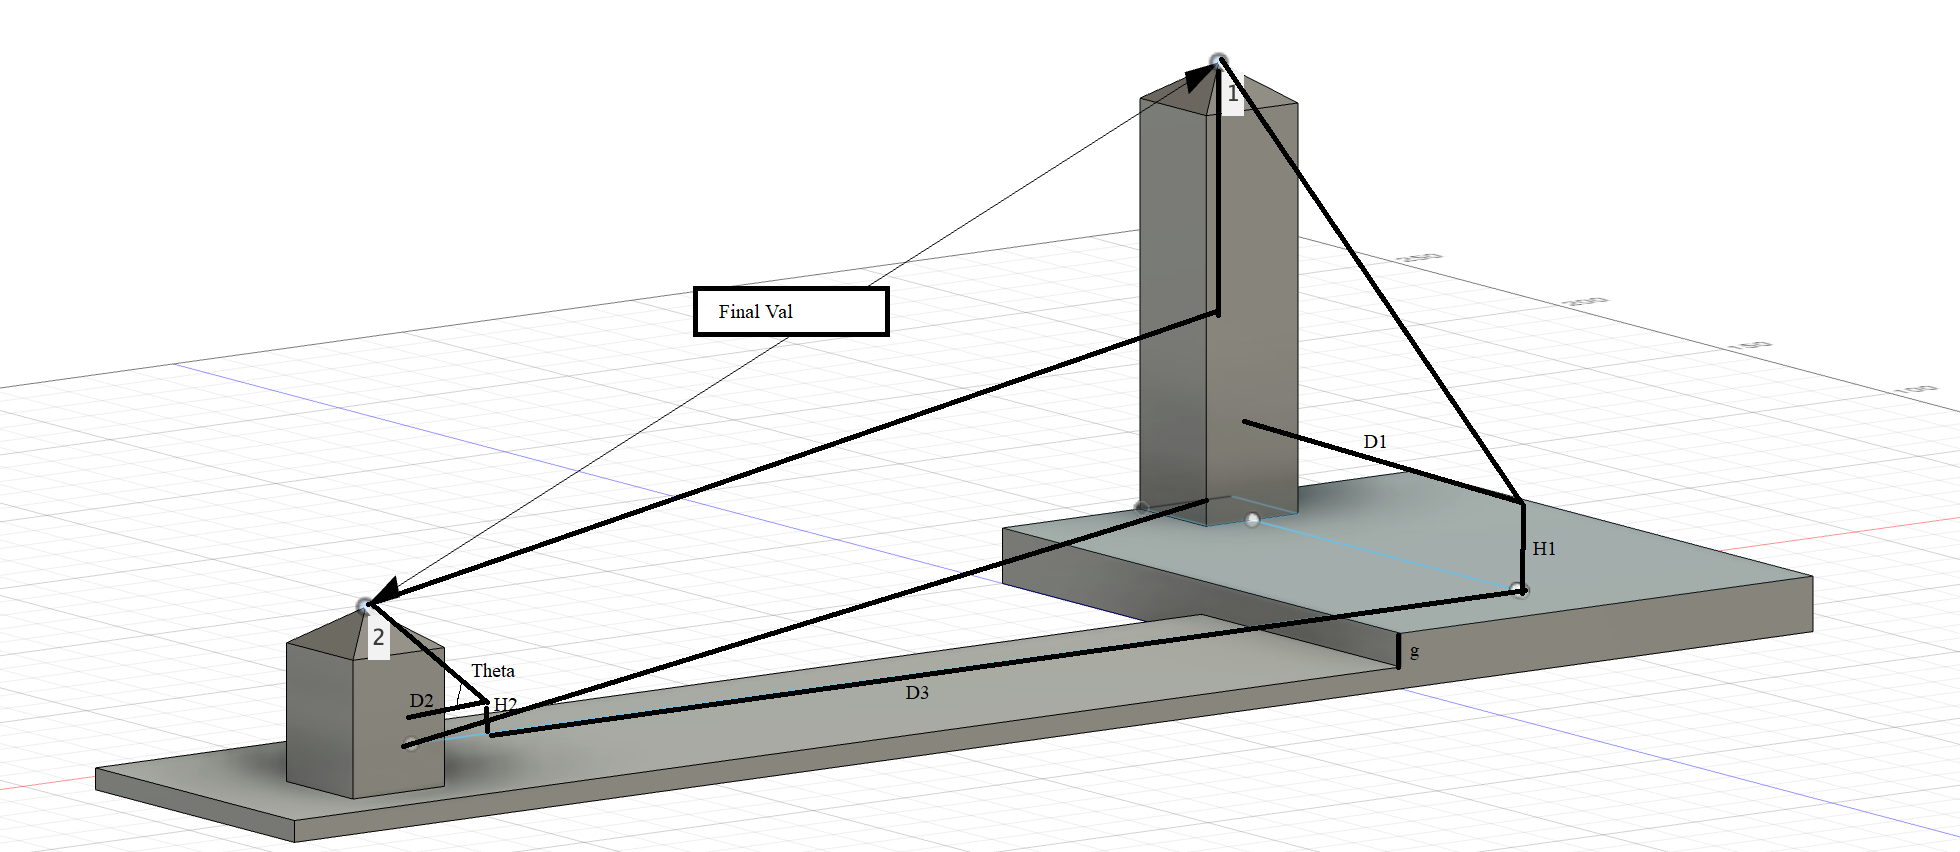

In [55]:
import math
import numpy as np
import pandas as pd
d1 = 81.25 #a
h1 = 0.59 #h

d2 = 26 #b
h2 = 1.14 #j
theta = 0.898408232 #o RADIANSSSS

d3 = 201.5 #c

gap = 6.06 #g

## Calculations:


When measuring the height of Gilman Hall, we created a 45-degree angle with two meter sticks. However, gravity caused this angle to decrease, and as such, our measured height of Gilman was considerably higher than it should have been. When measuring the height of Shriver Hall, the rope was aimed at the cupula of the hall, starting from eye height. The height of the rope in comparison to eye level and the distance from the face to the meter stick where the height was measured were measured. Using this, the angle was determined, and subsequently, the height, through similar triangles. For the horizontal distance between the two halls, the rope was pulled taught, and pivoted as one person moved around the other. The number of rotations was then counted, and distance was calculated. 

In [56]:
gillmanh = d1 + h1

schiverh = d2 * math.tan(theta) + h2

groundDistance = math.sqrt(d1 ** 2 + (d2 + d3) **2)

finalDistance = math.sqrt(groundDistance **2 + (gillmanh + gap - schiverh)**2)

print(f"calculated distance: {finalDistance:.3f}m")

calculated distance: 247.558m


## Error
When deciding on an estimated error, we looked at how the measurements were made. When manually measuring a length, such as the distance on the x-axis from Shriver to the perpendicular of Gilman, there was much more room for error than when measuring something mathematically, like the height of Shriver Hall. Therefore, we decided on higher margins of error for these measurements.

If we were to redo the lab, we only change the method through which we measured the height of Gilman Hall. Instead of creating a pre-determined angle with meter sticks, we should have used a small similar triangle to determine the angle, and as such, height. This method was used for Shriver Hall and worked great, which is why we should have measured Gillman using the same method. 

However, it is what it is. Lets calculate how our error propagated.
based off our drawing, we our final measurement between the distance of the tips of Gillman hall and Schryver hall is represented as:
$$f({d_1}, h_1, {d_1}, \theta_2, h_2, d_3, g) = \sqrt{{{d_1}}^2 + ({d_2} + d_3)^2 + \left(({d_1}+h_1 + g) - ({d_2}\tan \theta_2 + h_2)\right)^2}$$
And our estimated errors in each mesurement is as follows:
1. ${d_1} \pm 1m$
2. $h_1 \pm .05m$
3. ${d_2} \pm 0.5m$
4. $\theta_2 \pm 8.2 \degree$
5. $h_2 \pm .05m$
6. $d_3 \pm 4.5m$
7. $g \pm .05m$

So our error is expected to be the the sum of these partial differentials:
$$DF = \frac{\partial F}{\partial {d_1}}dd_g + \frac{\partial F}{\partial h_1}dh_g + \frac{\partial F}{\partial {d_2}}dd_s + \frac{\partial F}{\partial \theta_2}d\theta_2 + \frac{\partial F}{\partial h_2}dh_2 + \frac{\partial F}{\partial d_3}dd_3+ \frac{\partial F}{\partial g}dg$$

Here are the partial derivatives (I used wolfram alpha, Im not doing each of them by hand):

$$\frac{\partial F}{\partial {d_1}} = \frac{2({d_1} - {d_2}\tan(\theta) + g + h_1 - h_2) + 2{d_1}}{2\sqrt{{d_1}^2 + ({d_1} - {d_2}\tan(\theta) + g + h_1 - h_2)^2 + ({d_2} + c)^2}}$$
$$\frac{\partial F}{\partial {d_2}}= \frac{2({d_2}+c)-2\tan(\it{o})({d_1}-{d_2}\tan(\it{o})+g+h_1-h_2)}{2\sqrt{{d_1}^2+({d_1}-{d_2}\tan(\it{o})+g+h_1-h_2)^2+({d_2}+c)^2}}$$
$$\frac{\partial F}{\partial d_3} = \frac{{d_2}+c}{\sqrt{{d_1}^2 + ({d_1} - {d_2} \tan(\theta) + g + h_1 - h_2)^2 + ({d_2}+c)^2}}$$

$$\frac{\partial F}{\partial h_1} = \frac{{d_1} - {d_2}\tan{\left(o\right)} + g + h_1 - h_2}{\sqrt{{d_1}^2 + \left({d_1} - {d_2}\tan{\left(o\right)} + g + h_1 - h_2\right)^2 + \left({d_2} + c\right)^2}}$$
$$\frac{\partial F}{\partial h_2} = -\frac{{d_1} - {d_2}\tan{\theta} + g + h_1 - h_2}{\sqrt{{d_1}^2 + ({d_1} - {d_2}\tan{\theta} + g + h_1 - h_2)^2 + ({d_2} + c)^2}}$$

$$\frac{\partial F}{\partial \theta_2} = -\frac{{d_2} \sec^2(o)({d_1} - {d_2} \tan(o) + g + h_1 - h_2)}{\sqrt{{d_1}^2 + ({d_1} - {d_2} \tan(o) + g + h_1 - h_2)^2 + ({d_2} + c)^2}}$$

$$\frac{\partial F}{\partial g} = \frac{{d_1} - {d_2}\tan{\left (o \right )} + g + h_1 - h_2}{\sqrt{{d_1}^2 + \left ({d_1} - {d_2}\tan{\left (o \right )} + g + h_1 - h_2 \right )^2 + \left ({d_2} + c \right )^2}}$$

So multiply each differential by the tolerances, and add them up.


In [57]:
partialD1 = (2 * (d1 - d2 * math.tan(theta) + gap + h1 - h2) + 2 *d1)/(2 * math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2))
partialD2 = (2 *(d2 + d3) - 2 * math.tan(theta) *(d1 - d2 * math.tan(theta) + gap + h1 - h2))/(2 *math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2))
partialD3 = (d2 + d3)/math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2)
partialH1 = (d1 - d2 * math.tan(theta) + gap + h1 - h2)/math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2)
partialH2 = -(d1 - d2 * math.tan(theta) + gap + h1 - h2)/math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2)
partialGap = (d1 - d2 * math.tan(theta) + gap + h1 - h2)/math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2)
partialTheta =-(d2 /(math.cos(theta)**2) *(d1 - d2 * math.tan(theta) + gap + h1 - h2))/math.sqrt(d1**2 + (d1 - d2 * math.tan(theta) + gap + h1 - h2)**2 + (d2 + d3)**2)

partialderivatives = np.array([
    partialD1,
    partialD2,
    partialD3,
    partialH1,
    partialH2,
    partialGap,
    partialTheta
])

Now we can multiply these differentials by our tolerances. 

In [58]:
d1Tolerance = 1.0 #a
h1Tolerance = 0.05 #h

d2Tolerance = 0.5 #b
h2Tolerance = 0.05 #j
thetaTolerance = 0.0349066 #o RADIANS AGAIN

d3Tolerance = 4.5 #c

gapTolerance = .05 #g

tolerances = np.array([
    d1Tolerance,
    d2Tolerance,
    d3Tolerance,
    h1Tolerance,
    h2Tolerance,
    gapTolerance,
    thetaTolerance
])


final_err = partialderivatives.dot(tolerances)
print(f"Final error: {final_err:.3f}m")

Final error: 4.504m
